In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_path = 'datos/consumo-agua.csv'

## Limpieza de datos

In [3]:
def standarize_column_names(data, excluded_punctuation=".,-*¿?¡!"):
    data.columns = data.columns.str.lower().str.replace(" ", "_")
    for ch in excluded_punctuation:
        data.columns = data.columns.str.replace(ch, "")
        
        
def standarize_column_strings(data, columns, excluded_punctuation=".,-*¿?¡!"):
    for col in columns:
        data[col] = data[col].apply(lambda x: x.lower().replace(" ", "_"))
        data[col] = data[col].apply(lambda x: x.lower().replace("á", "a"))
        data[col] = data[col].apply(lambda x: x.lower().replace("é", "e"))
        data[col] = data[col].apply(lambda x: x.lower().replace("í", "i"))
        data[col] = data[col].apply(lambda x: x.lower().replace("ó", "o"))
        data[col] = data[col].apply(lambda x: x.lower().replace("ú", "u"))
        data[col] = data[col].apply(lambda x: x.lower().replace("ü", "u"))
        for ch in excluded_punctuation:
            data[col] = data[col].apply(lambda x: x.replace(ch, ""))
    
def replace_column_value(data, column, search_string, replace_string):
    data[column] = data[column].apply(lambda x: x.replace(search_string, replace_string))
    
    
def clean_data_from(path):
    """
    Función para realizar todas las transformaciones necesarias requeridas al 
    dataset del consumo de agua. 
    
    Inputs:
    -------
    
    path: str
          El path en tu compu donde está el archivo csv. ("/Users/etc/etc..")
    
    Returns:
    --------
    
    data: pandas dataframe
          Un dataframe en el formato correcto
    
    """
    #1. cargar la info y arreglar nombres de columnas
    data = pd.read_csv(path)
    standarize_column_names(data)
    
    #2. Transformar alcaldia, colonia, indice_des y nomgeo
    col_text = ["alcaldia", "colonia", "indice_des", "nomgeo"]
    standarize_column_strings(data, col_text)
    
    #3. Agregar latitud y longitud en formato numérico
    latitud = [float(e.split(",")[0]) for e in data["geo_point"]] 
    longitud = [float(e.split(",")[1]) for e in data["geo_point"]]
    data["latitud"] = latitud 
    data["longitud"] = longitud
    
    #4. Tirar variables irrelevantes
    data.drop(columns = ["geo_point", "geo_shape"], inplace = True)
    
    #5. Quitar el error de Talpan
    replace_column_value(data, 'nomgeo', 'talpan', 'tlalpan')
    
    #6. Homologar nombres entre nomgeo y alcaldia
    replace_column_value(data, 'nomgeo', 'cuajimalpa_de_morelos', 'cuajimalpa')
    replace_column_value(data, 'nomgeo', 'la_magdalena_contreras', 'magdalena_contreras')
    
    return data

In [4]:
data = clean_data_from(data_path)
data.head()

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,2019,gustavo_a_madero,42.566364,468.23,gustavo_a_madero,7_de_noviembre,53.24,631.00,42.066667,3.05,3,3.05,57250,alto,19.455260,-99.112662
1,0.00,2019,gustavo_a_madero,35.936667,107.81,gustavo_a_madero,7_de_noviembre,0.00,115.13,28.782500,7.32,3,7.32,57253,medio,19.455260,-99.112662
2,0.00,2019,gustavo_a_madero,24.586000,122.93,gustavo_a_madero,7_de_noviembre,0.00,197.96,32.993333,75.03,3,75.03,57255,popular,19.455720,-99.113582
3,0.00,2019,gustavo_a_madero,0.000000,0.00,gustavo_a_madero,nueva_tenochtitlan,0.00,253.53,84.510000,84.51,3,253.53,57267,bajo,19.459647,-99.104469
4,56.72,2019,azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.72,839.35,76.304545,121.57,3,243.14,57330,bajo,19.474161,-99.146750


In [5]:
standarize_column_strings(data, ["nomgeo"])
data.head()

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,2019,gustavo_a_madero,42.566364,468.23,gustavo_a_madero,7_de_noviembre,53.24,631.00,42.066667,3.05,3,3.05,57250,alto,19.455260,-99.112662
1,0.00,2019,gustavo_a_madero,35.936667,107.81,gustavo_a_madero,7_de_noviembre,0.00,115.13,28.782500,7.32,3,7.32,57253,medio,19.455260,-99.112662
2,0.00,2019,gustavo_a_madero,24.586000,122.93,gustavo_a_madero,7_de_noviembre,0.00,197.96,32.993333,75.03,3,75.03,57255,popular,19.455720,-99.113582
3,0.00,2019,gustavo_a_madero,0.000000,0.00,gustavo_a_madero,nueva_tenochtitlan,0.00,253.53,84.510000,84.51,3,253.53,57267,bajo,19.459647,-99.104469
4,56.72,2019,azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.72,839.35,76.304545,121.57,3,243.14,57330,bajo,19.474161,-99.146750


## Estudio de bimestres

¿De cuántos bimestres tenemos información?

In [6]:
data.bimestre.nunique()

3

¿Cúantas observaciones se tiene por bimestre?

In [7]:
conteo_bimestres = data.bimestre.value_counts()
bim_df = pd.DataFrame(data={'bimestre': conteo_bimestres.index, 'observaciones': conteo_bimestres.values})
bim_df.sort_values(by=['bimestre'], inplace=True, ignore_index=True)
bim_df

,bimestre,observaciones
0,1,23338
1,2,23942
2,3,23822


Text(0.5, 1.0, 'Observaciones por bimestre')

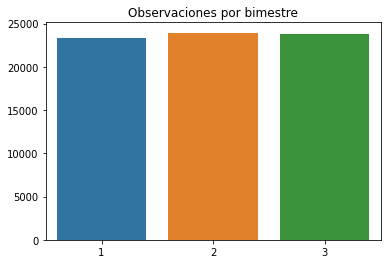

In [8]:
sns.barplot(x=conteo_bimestres.index, 
            y=conteo_bimestres.values).set_title("Observaciones por bimestre")

## Estudio de alcaldías y nomgeo

¿Cuántas alcaldías existen?

In [9]:
no_alcaldias = len(data.alcaldia.unique())
print(f"Existen {no_alcaldias} alcaldías diferentes")

Existen 16 alcaldías diferentes


In [10]:
print(f"Existen {len(data.nomgeo.unique())} valores para 'nomgeo' diferentes")

Existen 16 valores para 'nomgeo' diferentes


¿En cuántas observaciones no coinciden los valores de `alcaldia` y `nomgeo`?

In [11]:
len(data[data.nomgeo != data.alcaldia])

0

¿Se tienen números de observaciones similares para cada alcadía?

Text(0.5, 1.0, 'Observaciones por alcaldía')

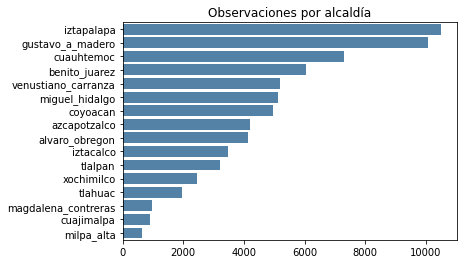

In [12]:
conteo_alcaldias = data.alcaldia.value_counts()
sns.barplot(x=conteo_alcaldias.values, 
            y=conteo_alcaldias.index,
            color='steelblue',
            orient='h').set_title("Observaciones por alcaldía")

## Perfilamiento de colonias por alcaldia

¿Cuántas colonias diferentes existen?

In [13]:
data.colonia.nunique()

1340

¿Cuántas colonias se tienen por alcaldía?

In [14]:
alcaldias = data.alcaldia.unique()
perfil_colonias = {}

for alcaldia in alcaldias: 
    observaciones_alcaldia = data[data.alcaldia == alcaldia]
    no_colonias = observaciones_alcaldia.colonia.nunique()
    perfil_colonias[alcaldia] = [no_colonias]

colonias_por_alcaldia = pd.melt(pd.DataFrame(perfil_colonias), var_name="alcaldia", value_name="colonias")
colonias_por_alcaldia.sort_values(by=['alcaldia'], inplace=True, ignore_index=True)
colonias_por_alcaldia

,alcaldia,colonias
0,alvaro_obregon,188
1,azcapotzalco,88
2,benito_juarez,53
3,coyoacan,96
4,cuajimalpa,39
5,cuauhtemoc,35
6,gustavo_a_madero,167
7,iztacalco,38
8,iztapalapa,193
9,magdalena_contreras,38


Actualizando con [datos](https://datos.cdmx.gob.mx/explore/dataset/coloniascdmx/table/) reales de la CDMX:

In [15]:
colonias_por_alcaldia['colonias_oficiales'] = [249, 111, 64, 153, 43, 64, 232, 55, 293, 52, 88, 12, 58, 178, 80, 80]
colonias_por_alcaldia['fraccion'] =\
            round(colonias_por_alcaldia.colonias / colonias_por_alcaldia.colonias_oficiales, 2) * 100
colonias_por_alcaldia

,alcaldia,colonias,colonias_oficiales,fraccion
0,alvaro_obregon,188,249,76.0
1,azcapotzalco,88,111,79.0
2,benito_juarez,53,64,83.0
3,coyoacan,96,153,63.0
4,cuajimalpa,39,43,91.0
5,cuauhtemoc,35,64,55.0
6,gustavo_a_madero,167,232,72.0
7,iztacalco,38,55,69.0
8,iztapalapa,193,293,66.0
9,magdalena_contreras,38,52,73.0


Ejemplo de divergencia:

In [16]:
colonias_milpa_alta = data[data.alcaldia == 'milpa_alta'].colonia.unique()
[colonia for colonia in colonias_milpa_alta if 'villa_milpa_alta' in colonia]

['pblo_villa_milpa_alta_bo_la_concepcion',
 'pblo_villa_milpa_alta_bo_los_angeles',
 'pblo_villa_milpa_alta_bo_santa_martha',
 'pblo_villa_milpa_alta_bo_san_mateo',
 'pblo_villa_milpa_alta_bo_santa_cruz',
 'villa_milpa_alta_centro',
 'pblo_villa_milpa_alta_bo_san_agustin',
 'pblo_villa_milpa_alta_bo_la_luz']

Text(0.5, 1.0, 'Número de colonias por alcaldía')

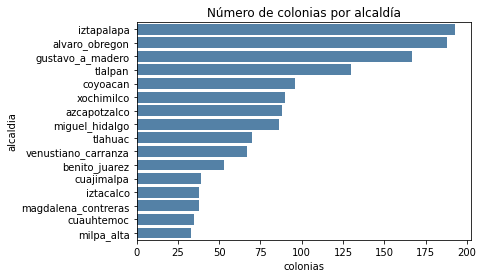

In [17]:
sns.barplot(
    x='colonias', 
    y='alcaldia', 
    data=colonias_por_alcaldia.sort_values('colonias', ascending=False),
    color='steelblue',
    orient='h').set_title("Número de colonias por alcaldía")

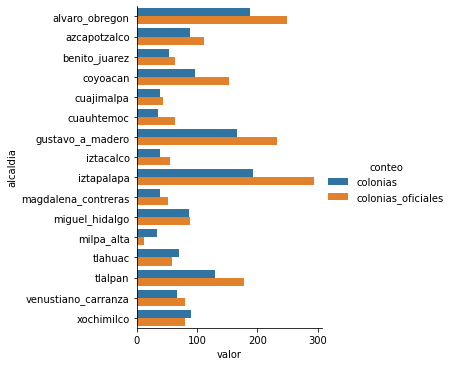

In [18]:
long_colonias_alcaldia = pd.melt(colonias_por_alcaldia, 
                                 id_vars=['alcaldia'], 
                                 value_vars=['colonias', 'colonias_oficiales'],
                                 var_name='conteo',
                                 value_name='valor')

sns.catplot(kind='bar', x="valor", y='alcaldia', hue="conteo", data=long_colonias_alcaldia, orient='h')

## Perfilamiento de colonias por `indice_des`

¿Cuantás colonias existen por índice de desarrollo?

In [19]:
indices_des = data.indice_des.unique()
perfil_indice_des = {}

for indice in indices_des: 
    observaciones_indice_des = data[data.indice_des == indice]
    no_colonias = observaciones_indice_des.colonia.nunique()
    perfil_indice_des[indice] = [no_colonias]

colonias_por_indice = pd.melt(pd.DataFrame(perfil_indice_des), var_name="indice_des", value_name="colonias")
colonias_por_indice

,indice_des,colonias
0,alto,512
1,medio,558
2,popular,1124
3,bajo,958


Text(0.5, 1.0, "Número de colonias por 'indice_des'")

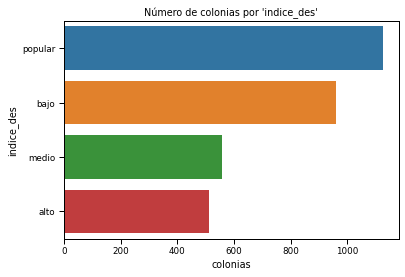

In [20]:
sns.set_context('paper')

sns.barplot(x='colonias', 
            y="indice_des", 
            data=colonias_por_indice.sort_values('colonias', ascending=False), 
            orient="h").set_title("Número de colonias por 'indice_des'")

## Errores en la transferencia de datos

In [21]:
data.head()

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,2019,gustavo_a_madero,42.566364,468.23,gustavo_a_madero,7_de_noviembre,53.24,631.00,42.066667,3.05,3,3.05,57250,alto,19.455260,-99.112662
1,0.00,2019,gustavo_a_madero,35.936667,107.81,gustavo_a_madero,7_de_noviembre,0.00,115.13,28.782500,7.32,3,7.32,57253,medio,19.455260,-99.112662
2,0.00,2019,gustavo_a_madero,24.586000,122.93,gustavo_a_madero,7_de_noviembre,0.00,197.96,32.993333,75.03,3,75.03,57255,popular,19.455720,-99.113582
3,0.00,2019,gustavo_a_madero,0.000000,0.00,gustavo_a_madero,nueva_tenochtitlan,0.00,253.53,84.510000,84.51,3,253.53,57267,bajo,19.459647,-99.104469
4,56.72,2019,azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.72,839.35,76.304545,121.57,3,243.14,57330,bajo,19.474161,-99.146750


¿Existen valores negativos para el consumo?

In [22]:
consumos = ['consumo_total_mixto', 'consumo_prom_mixto', 
            'consumo_total_dom', 'consumo_prom_dom',
            'consumo_total_no_dom', 'consumo_prom_no_dom',
            'consumo_total', 'consumo_prom']

In [23]:
print("número de datos con valores negativos")
for consumo in consumos:
    print(f"{consumo}: {len(data[data[consumo] < 0])}")

número de datos con valores negativos
consumo_total_mixto: 0
consumo_prom_mixto: 0
consumo_total_dom: 0
consumo_prom_dom: 0
consumo_total_no_dom: 0
consumo_prom_no_dom: 0
consumo_total: 0
consumo_prom: 0


¿Existen valores igual a cero para el consumo?

In [24]:
print("número de datos con valores igual a cero")
for consumo in consumos:
    print(f"{consumo}: {len(data[data[consumo] == 0])}")

número de datos con valores igual a cero
consumo_total_mixto: 17715
consumo_prom_mixto: 17715
consumo_total_dom: 9861
consumo_prom_dom: 9861
consumo_total_no_dom: 8109
consumo_prom_no_dom: 8109
consumo_total: 2451
consumo_prom: 2451


¿Existen incoherencias en los datos?
* consumo total no sea la suma de los otros consumos
* número manzanas total no sea suma de las otras

In [25]:
data_sin_na = data[data.consumo_total_mixto.notna() & data.consumo_prom_mixto.notna()
                   & data.consumo_total_dom.notna() & data.consumo_prom_dom.notna()
                   & data.consumo_total_no_dom.notna() & data.consumo_prom_no_dom.notna()
                   & data.consumo_total.notna() & data.consumo_prom.notna()
                  ]
data_sin_na.shape

(62214, 17)

In [26]:
data_sin_na[
    data_sin_na.consumo_total - 
    (data_sin_na.consumo_total_dom 
     + data_sin_na.consumo_total_mixto
     + data_sin_na.consumo_total_no_dom) > 0.1]

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
3406,263.50,2019,azcapotzalco,22.093254,35304.9,azcapotzalco,pueblo_san_pedro_xalpa,43.916667,38202.3,22.944324,43.176721,1,2633.78,10242,bajo,19.485379,-99.214602
5248,269.62,2019,iztapalapa,15.545850,13711.4,iztapalapa,cerro_de_la_estrella,44.936666,14720.6,16.212038,36.973500,1,739.47,15762,popular,19.320860,-99.082134
37897,745.00,2019,miguel_hidalgo,19.032708,11457.7,miguel_hidalgo,argentina_poniente,372.499989,15783.7,23.699040,57.755967,1,3580.87,5556,medio,19.458390,-99.212368
38327,87.73,2019,benito_juarez,19.732022,11128.8,benito_juarez,del_valle_sur,29.243333,12309.7,21.042154,60.726110,1,1093.07,6939,alto,19.366301,-99.173193
55359,405.10,2019,gustavo_a_madero,21.116508,21771.1,gustavo_a_madero,pueblo_san_juan_de_aragon,45.011111,22212.0,21.113954,2.971667,1,35.66,14334,popular,19.472761,-99.080922
59616,301.02,2019,benito_juarez,24.544655,30950.8,benito_juarez,xoco,60.204001,31951.0,24.942115,46.601334,1,699.02,7094,bajo,19.363226,-99.163712


In [27]:
manzanas = round(data_sin_na.consumo_total / data_sin_na.consumo_prom)
manzanas_dom = round(data_sin_na.consumo_total_dom / data_sin_na.consumo_prom_dom)
manzanas_no_dom = round(data_sin_na.consumo_total_no_dom / data_sin_na.consumo_prom_no_dom)
manzanas_mixto = round(data_sin_na.consumo_total_mixto / data_sin_na.consumo_prom_mixto)

manzanas.fillna(0, inplace=True)
manzanas_dom.fillna(0, inplace=True)
manzanas_no_dom.fillna(0, inplace=True)
manzanas_mixto.fillna(0, inplace=True)

In [28]:
manzanas_df = pd.DataFrame(data={
    'tot': manzanas,
    'dom': manzanas_dom,
    'no_dom': manzanas_no_dom,
    'mixto': manzanas_mixto
})

In [29]:
manzanas_df['delta'] = manzanas_df.tot - (manzanas_df.dom + manzanas_df.no_dom + manzanas_df.mixto)
manzanas_df

,tot,dom,no_dom,mixto,delta
0,15.0,11.0,1.0,3.0,0.0
1,4.0,3.0,1.0,0.0,0.0
2,6.0,5.0,1.0,0.0,0.0
3,3.0,0.0,3.0,0.0,0.0
4,11.0,8.0,2.0,1.0,0.0
...,...,...,...,...,...
71096,111.0,107.0,2.0,2.0,0.0
71098,467.0,452.0,13.0,2.0,0.0
71099,194.0,171.0,15.0,8.0,0.0
71100,23.0,18.0,1.0,4.0,0.0


In [30]:
len(manzanas_df[manzanas_df.delta != 0])

5650

In [31]:
conteo_deltas = manzanas_df.delta.value_counts()
deltas_df = pd.DataFrame(data={
    'diferencia': conteo_deltas.index,
    'observaciones': conteo_deltas.values})

deltas_df["fraccion"] = round(deltas_df.observaciones / sum(deltas_df.observaciones), 3) * 100

deltas_df.sort_values(["diferencia"])

,diferencia,observaciones,fraccion
0,0.0,56564,90.9
1,1.0,4742,7.6
2,2.0,707,1.1
3,3.0,139,0.2
4,4.0,34,0.1
5,5.0,16,0.0
9,6.0,1,0.0
6,7.0,6,0.0
7,8.0,3,0.0
8,16.0,2,0.0


<AxesSubplot:xlabel='diferencia', ylabel='observaciones'>

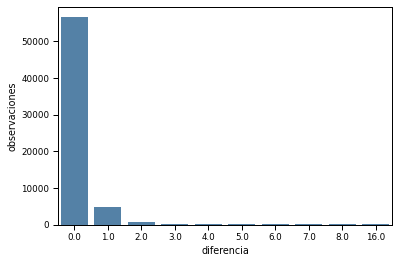

In [32]:
sns.barplot(x="diferencia", 
            y="observaciones",
            color="steelblue",
            data=deltas_df)

<AxesSubplot:xlabel='diferencia', ylabel='observaciones'>

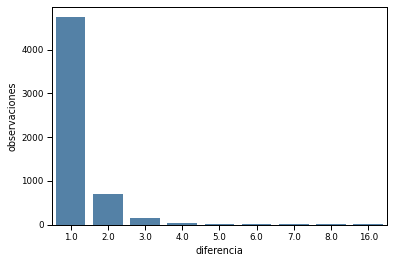

In [33]:
sns.barplot(x="diferencia", 
            y="observaciones",
            color="steelblue",
            data=deltas_df[deltas_df.diferencia != 0])

/Users/antoniolechuga/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/antoniolechuga/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/antoniolechuga/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/antoniolechuga/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


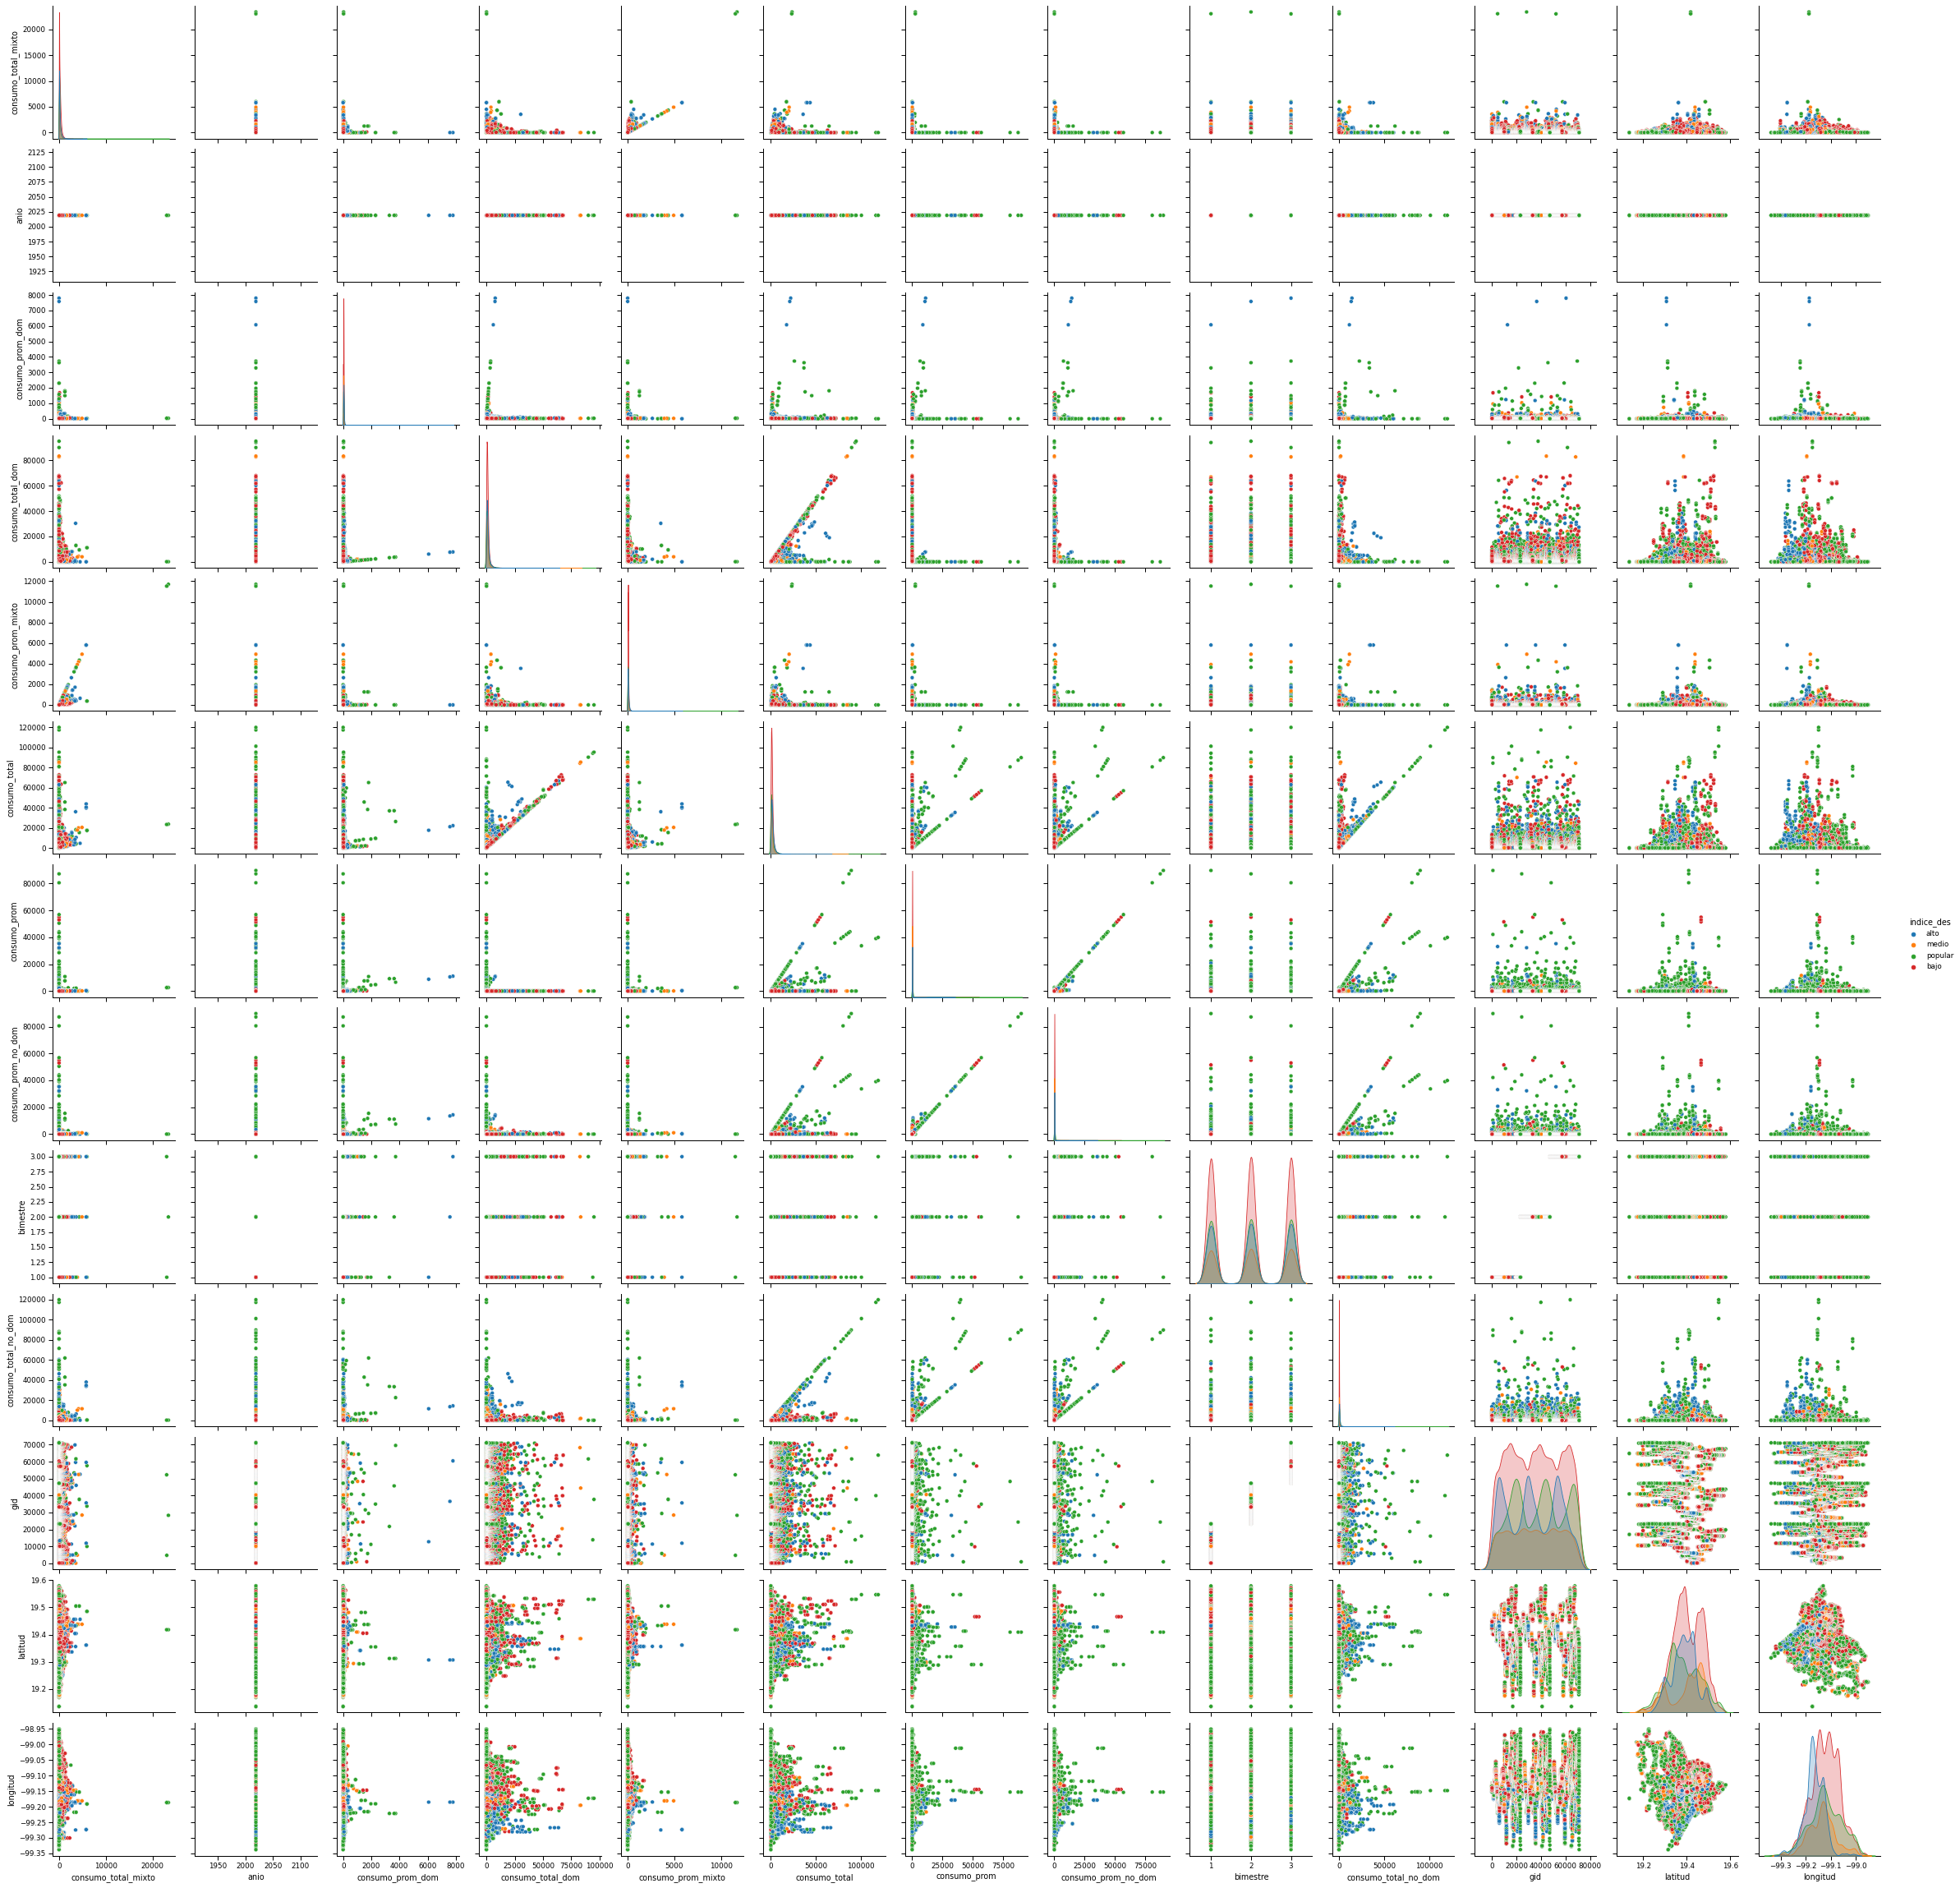

In [34]:
sns.pairplot(data, hue='indice_des')